<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/05_transfer_learning_in_tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-04 03:38:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-04 03:38:21 (71.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir 

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-03-03 16:28:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  47.3MB/s    in 3.4s    

2022-03-03 16:28:45 (47.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip')

NameError: ignored

In [ ]:
walk_through_dir('10_food_classes_10_percent')

In [ ]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

NameError: ignored

In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images.shape, labels)

(32, 224, 224, 3) tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 

## Functional API

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)(inputs) #if using resnet

x = base_model(inputs)
print(f'shapes of outputs from base model {x.shape}')

# x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
# print(f'shapes of outputs from global average pooling layer {x.shape}')
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)


model_0.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])


52617216/52606240 [==============================] - 1s 0us/step
shapes of outputs from base model (None, 7, 7, 1536)


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
history_0 = model_0.fit(train_data_10_percent,epochs=5)

Epoch 1/5
24/24 [==============================] - 18s 262ms/step - loss: 2.1350 - accuracy: 0.6467
Epoch 2/5
24/24 [==============================] - 7s 261ms/step - loss: 0.1046 - accuracy: 0.9720
Epoch 3/5
24/24 [==============================] - 7s 261ms/step - loss: 0.0256 - accuracy: 0.9893
Epoch 4/5
24/24 [==============================] - 7s 263ms/step - loss: 0.0020 - accuracy: 0.9987
Epoch 5/5
24/24 [==============================] - 7s 261ms/step - loss: 7.9008e-05 - accuracy: 1.0000


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 24s 261ms/step - loss: 1.2831 - accuracy: 0.8228


[1.2830843925476074, 0.8227999806404114]

In [ ]:
plot_loss_curves(history_0)

KeyError: ignored

In [ ]:
!tensorboard dev upload --logdir ./tensorboard/ \
--name 'functional API model results on 10% food data' \
--one_shot

In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

In [ ]:
base_model.layers

# Experiments: model1, model2, model3, model4

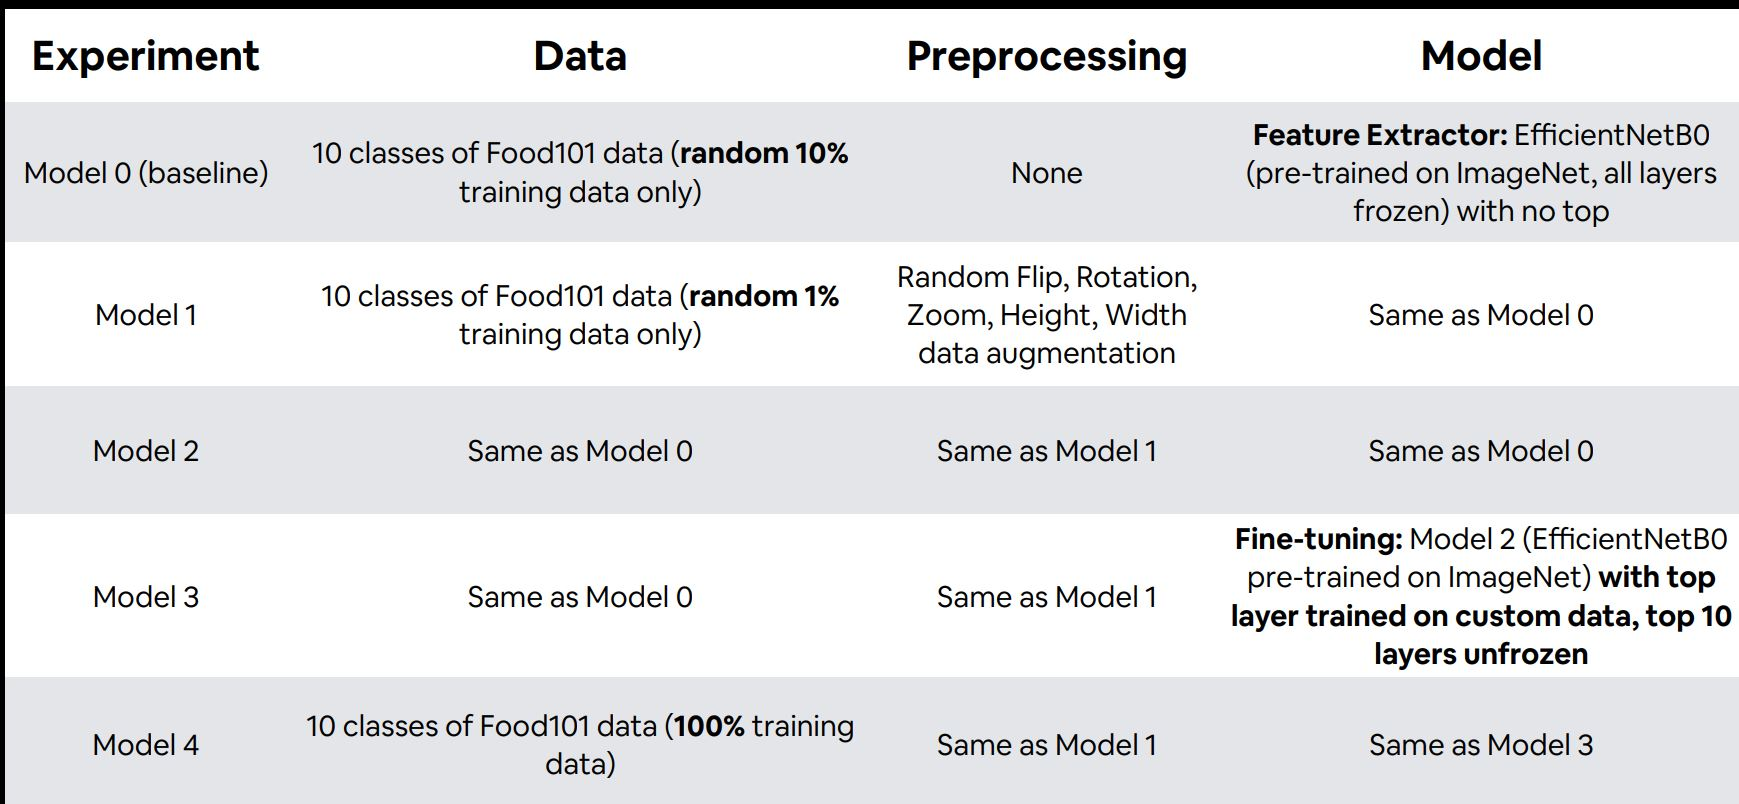

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-04 05:37:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-04 05:37:09 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir 

## load data:

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-03-04 05:37:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 142.250.81.208, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  86.8MB/s    in 1.9s    

2022-03-04 05:37:11 (86.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
unzip_data('10_food_classes_10_percent.zip')

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-03-04 05:37:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 142.250.81.208, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  64.5MB/s    in 2.0s    

2022-03-04 05:37:15 (64.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [9]:
unzip_data('10_food_classes_1_percent.zip')

In [10]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-03-04 05:37:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  56.9MB/s    in 10s     

2022-03-04 05:37:27 (47.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [11]:
unzip_data('10_food_classes_all_data.zip')

## create training and test datasets:

In [12]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [13]:
test_dir = '10_food_classes_all_data/test'
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

Found 2500 files belonging to 10 classes.


In [14]:
print('training set:')
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_all_data/train',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_all_data/test',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 7500 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [15]:
print('training set:')
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_10_percent/train',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_10_percent/test',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 750 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [16]:
print('training set:')
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_1_percent/train/',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_1_percent/test/',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 70 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [17]:
train_data_all.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.Resizing(224,224)
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

And that's it! Our data augmentation Sequential model is ready to go. As you'll see shortly, we'll be able to slot this "model" as a layer into our transfer learning model later on.

But before we do that, let's test it out by passing random images through it.

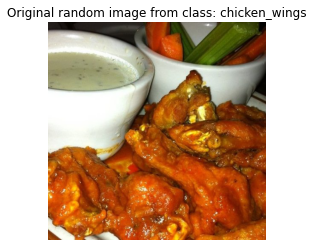

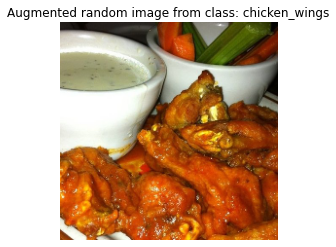

In [47]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(img) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow((augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## building model 1 , using only 1 percent of training data using Functional API:


### model 1 without data augmentation:

In [36]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = data_augmentation(inputs)

x = base_model(inputs,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_1 = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_1')

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_________________________________________________________________


In [37]:
model_1.fit(train_data_1_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_1'))

Saving TensorBoard log files to: tensorboard/model_1/20220304-055013
Epoch 1/15
3/3 [==============================] - 9s 2s/step - loss: 3.8128 - accuracy: 0.1429 - val_loss: 1.8992 - val_accuracy: 0.5493
Epoch 2/15
3/3 [==============================] - 2s 943ms/step - loss: 0.0135 - accuracy: 0.9857 - val_loss: 4.9059 - val_accuracy: 0.4062
Epoch 3/15
3/3 [==============================] - 2s 933ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 7.1634 - val_accuracy: 0.3783
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 8.4549 - val_accuracy: 0.3783
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 1.5446e-04 - accuracy: 1.0000 - val_loss: 8.2630 - val_accuracy: 0.3882
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 1.1859e-04 - accuracy: 1.0000 - val_loss: 8.9384 - val_accuracy: 0.4079
Epoch 7/15
3/3 [==============================] - 2s 962ms/step - loss: 1.1058e-04 - accuracy: 

In [38]:
model_1.evaluate(test_data) 

79/79 [==============================] - 6s 71ms/step - loss: 9.3409 - accuracy: 0.4312


[9.340923309326172, 0.4311999976634979]

### model 1 with data augmentation:

In [39]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_1_aug = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_1')

model_1_aug.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (224, 224, 3)            0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
___________________________________________

In [40]:
model_1_aug.fit(train_data_1_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_1'))

Saving TensorBoard log files to: tensorboard/model_1/20220304-055121
Epoch 1/15
3/3 [==============================] - 9s 2s/step - loss: 3.2854 - accuracy: 0.0714 - val_loss: 2.2984 - val_accuracy: 0.4885
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.8689 - accuracy: 0.7571 - val_loss: 2.6604 - val_accuracy: 0.5411
Epoch 3/15
3/3 [==============================] - 2s 935ms/step - loss: 0.6208 - accuracy: 0.8286 - val_loss: 2.4319 - val_accuracy: 0.5641
Epoch 4/15
3/3 [==============================] - 2s 943ms/step - loss: 0.4050 - accuracy: 0.9000 - val_loss: 2.6655 - val_accuracy: 0.5576
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.0853 - accuracy: 0.9714 - val_loss: 3.0862 - val_accuracy: 0.5493
Epoch 6/15
3/3 [==============================] - 2s 939ms/step - loss: 0.1755 - accuracy: 0.9571 - val_loss: 2.9542 - val_accuracy: 0.5674
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.2597 - accuracy: 0.9286 - val

In [42]:
model_1_aug.evaluate(test_data) 

79/79 [==============================] - 6s 70ms/step - loss: 3.7218 - accuracy: 0.5624


[3.721769094467163, 0.5623999834060669]

## building model 2 , using 10 percent of training data using Functional API:


### model 2 without data augmentation:

In [48]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = data_augmentation(inputs)

x = base_model(inputs,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_2 = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_2')

model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_________________________________________________________________


In [49]:
model_2.fit(train_data_10_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_2'))

Saving TensorBoard log files to: tensorboard/model_2/20220304-055631
Epoch 1/15
24/24 [==============================] - 12s 267ms/step - loss: 2.2122 - accuracy: 0.5733 - val_loss: 1.7590 - val_accuracy: 0.7319
Epoch 2/15
24/24 [==============================] - 4s 173ms/step - loss: 0.2103 - accuracy: 0.9547 - val_loss: 1.6001 - val_accuracy: 0.7714
Epoch 3/15
24/24 [==============================] - 5s 205ms/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 1.3822 - val_accuracy: 0.7895
Epoch 4/15
24/24 [==============================] - 5s 192ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 1.7824 - val_accuracy: 0.7730
Epoch 5/15
24/24 [==============================] - 5s 166ms/step - loss: 3.6129e-04 - accuracy: 1.0000 - val_loss: 1.7435 - val_accuracy: 0.7763
Epoch 6/15
24/24 [==============================] - 4s 150ms/step - loss: 7.2372e-05 - accuracy: 1.0000 - val_loss: 1.8556 - val_accuracy: 0.7566
Epoch 7/15
24/24 [==============================] - 5s 183ms/step - lo

In [51]:
model_2.evaluate(test_data) 

79/79 [==============================] - 6s 71ms/step - loss: 1.6739 - accuracy: 0.7664


[1.673852562904358, 0.7663999795913696]

### model 2 with data augmentation:

In [52]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_2_aug = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_2_aug')

model_2_aug.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2_aug.summary()

Model: "model_2_aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (224, 224, 3)            0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_______________________________________

In [53]:
model_2_aug.fit(train_data_10_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_2_aug'))

Saving TensorBoard log files to: tensorboard/model_2_aug/20220304-055908
Epoch 1/15
24/24 [==============================] - 11s 245ms/step - loss: 2.5637 - accuracy: 0.5200 - val_loss: 2.0423 - val_accuracy: 0.6908
Epoch 2/15
24/24 [==============================] - 5s 186ms/step - loss: 1.3825 - accuracy: 0.7653 - val_loss: 1.5655 - val_accuracy: 0.7484
Epoch 3/15
24/24 [==============================] - 4s 153ms/step - loss: 1.0735 - accuracy: 0.8000 - val_loss: 2.0491 - val_accuracy: 0.7336
Epoch 4/15
24/24 [==============================] - 4s 152ms/step - loss: 0.7944 - accuracy: 0.8480 - val_loss: 1.9140 - val_accuracy: 0.7664
Epoch 5/15
24/24 [==============================] - 5s 187ms/step - loss: 0.9347 - accuracy: 0.8387 - val_loss: 1.9368 - val_accuracy: 0.7763
Epoch 6/15
24/24 [==============================] - 5s 187ms/step - loss: 0.6882 - accuracy: 0.8867 - val_loss: 2.3368 - val_accuracy: 0.7286
Epoch 7/15
24/24 [==============================] - 4s 152ms/step - loss: 

In [54]:
model_2_aug.evaluate(test_data) 

79/79 [==============================] - 6s 75ms/step - loss: 2.7264 - accuracy: 0.7532


[2.7263858318328857, 0.7531999945640564]